# Regression Trees


Regression trees are a type of [decision tree](https://fedmug.github.io/kbtu-ml-book/decision_trees/decision_tree.html) used for predicting continuous numerical outcomes. They recursively split the dataset into subsets based on feature values, with each leaf node representing a predicted numeric value for the target variable.



## Why Regression Trees?

Decision trees and regression trees share a common structure as hierarchical tree models, but their primary difference lies in the nature of the target variable they predict. Decision trees are versatile and can handle both categorical and numerical targets using methods like [Classification](https://fedmug.github.io/kbtu-ml-book/decision_trees/classification.html#) and Regression Trees (**CART**). In contrast, regression trees specifically focus on predicting continuous numerical outcomes, making them suitable for scenarios where the response variable is quantitative.


As with the Decision trees to create a Regression trees we neeed to:
* Divide the predictor space into J distinct and non-overlapping regions
* For each observation within a region, predict the mean of the response value in that specific region.
* The division of each region is determined by minimizing the **Residual Sum of Squares** (**RSS**) through a top-down greedy approach known as **recursive binary splitting**.




<br><br>

**Recursive Binary Splitting:**

The process begins with the selection of a feature $X_j$ and a threshold value $t$ to partition the data into two subsets $R_1(j, t)$ and $R_2(j, t)$:

$$ R_1(j, t) = \{X | X_j \leq t\} $$

$$ R_2(j, t) = \{X | X_j > t\} $$

<br>

For splitting we also can use MSE:<br><br>

$$ {MSE} = \frac{1}{n_1} \sum_{i \in R_1} (y_i - \bar{y}_1)^2 + \frac{1}{n_2} \sum_{i \in R_2} (y_i - \bar{y}_2)^2 $$
<br>

where ${y}_1$ and ${y}_2$ are the means of the target variable in $R_1$ and $R_2$ respectively, and $n_1$ and $n_2$ are the respective sample sizes.


<br>
<br>

#Building Regression trees

## Training Process

Training a regression tree involves a recursive process of node splitting. This section outlines the step-by-step algorithm used to construct the tree, shedding light on the decision-making mechanism at each stage.


<br>




```{tip}
Let's test it on example:

```

Load the dataset:

In [19]:
import numpy as np
import pandas as pd

boston = pd.read_csv("../ISLP_datasets/Boston.csv").drop("Unnamed: 0", axis=1)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


Prepare the data:

In [20]:
y = boston['medv']
X = boston.drop('medv', axis=1)


Split the data:

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor, plot_tree, export_graphviz

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Train a regression decision tree:

In [38]:
from sklearn.tree import DecisionTreeRegressor, plot_tree, export_graphviz
from sklearn.metrics import mean_squared_error


DT = DecisionTreeRegressor()
DT.fit(X_train, y_train)
print("Train R-score:", DT.score(X_train, y_train))
print("Test R-score:", DT.score(X_test, y_test))

y_pred = DT.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Train R-score: 1.0
Test R-score: 0.8148315641225542
Mean Squared Error: 15.138227848101266


For a better tree visualisation, we use {bdg-danger-line}`graphviz` and {bdg-danger-line}`ipywidgets` . Let's make trees with 3 different depths:

In [56]:
from IPython.display import display, Image
import ipywidgets as widgets
from ipywidgets import interactive
from PIL import Image as PILImage
import numpy as np
from sklearn.tree import DecisionTreeRegressor, export_graphviz
import graphviz
from sklearn.model_selection import train_test_split

reg_tree_depth_2 = DecisionTreeRegressor(max_depth=2)
reg_tree_depth_4 = DecisionTreeRegressor(max_depth=4)
reg_tree_depth_7 = DecisionTreeRegressor(max_depth=7)

reg_tree_depth_2.fit(X_train, y_train)
reg_tree_depth_4.fit(X_train, y_train)
reg_tree_depth_7.fit(X_train, y_train)

dot_data_7 = export_graphviz(reg_tree_depth_7, out_file=None,
                           feature_names=boston.columns[:-1],
                           filled=True, rounded=True,
                           special_characters=True)

dot_data_4 = export_graphviz(reg_tree_depth_4, out_file=None,
                           feature_names=boston.columns[:-1],
                           filled=True, rounded=True,
                           special_characters=True)

dot_data_2 = export_graphviz(reg_tree_depth_2, out_file=None,
                           feature_names=boston.columns[:-1],
                           filled=True, rounded=True,
                           special_characters=True)

graph_2 = graphviz.Source(dot_data_2, format='png')
graph_4 = graphviz.Source(dot_data_4, format='png')
graph_7 = graphviz.Source(dot_data_7, format='png')

graph_2.render("regression_tree_depth_2")
graph_4.render("regression_tree_depth_4")
graph_7.render("regression_tree_depth_7")

tree_selector = widgets.Dropdown(
    options={'Depth 2': 'regression_tree_depth_2.png',
             'Depth 4': 'regression_tree_depth_5.png',
             'Depth 7': 'regression_tree_depth_10.png'},
    value='regression_tree_depth_2.png',
    description='Tree Depth:'
)

def update_image(tree_depth):
    display(Image(filename=tree_depth))

interactive_plot = interactive(update_image, tree_depth=tree_selector)

display(interactive_plot)


interactive(children=(Dropdown(description='Tree Depth:', options={'Depth 2': 'regression_tree_depth_2.png', '…

<br>

## Pruning

To prevent overfitting, regression trees often undergo a pruning process. The visualization of the pruning process helps understand the trade-off between model complexity and predictive performance. Overall, pruning contributes to creating effective decision trees for various machine learning applications.


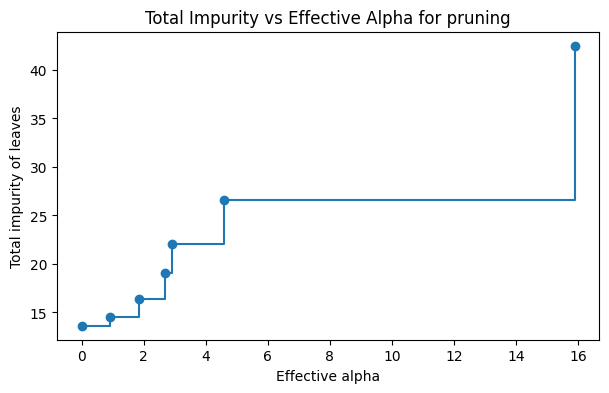

In [57]:
path = DT.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

plt.figure(figsize=(7, 4))
plt.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
plt.xlabel("Effective alpha")
plt.ylabel("Total impurity of leaves")
plt.title("Total Impurity vs Effective Alpha for pruning")
plt.show()

<br><br>

```{note}

A regression tree is a type of decision tree used for solving regression problems. Regression problems involve predicting a continuous target variable, as opposed to classification problems where the goal is to predict discrete class labels. Regression trees are a popular machine learning technique for modeling relationships between input features and continuous outcomes.


```


<br><br>



```{tip}
Another example: Ice Cream Sales Prediction based on Temperature

```

<br>
Let's think that we have a scenario where the sales of ice cream are influenced by the temperature. The synthetic data is generated with some noise to represent real-world variability. The regression trees are used to predict ice cream sales based on different decision tree models.


In [59]:
import plotly.graph_objects as go
import numpy as np
from sklearn.tree import DecisionTreeRegressor

np.random.seed(42)

Generate synthetic temperature data:

In [61]:
temperature = np.sort(5 * np.random.rand(80, 1), axis=0)
ice_cream_sales = np.sin(temperature).ravel() + np.random.normal(0, 0.1, temperature.shape[0])

Fit a single regression tree:

In [62]:
regressor = DecisionTreeRegressor(max_depth=5)
regressor.fit(temperature, ice_cream_sales)

DecisionTreeRegressor(max_depth=5)

Create a single subplot and plot predictions from the tree:

In [63]:
fig = go.Figure()

scatter = go.Scatter(x=temperature.squeeze(), y=ice_cream_sales, mode='markers', marker=dict(color='darkred'), name='Sales Data')
fig.add_trace(scatter)

Plot predictions from the tree:

In [65]:
temperature_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
sales_pred = regressor.predict(temperature_test)
line = go.Scatter(x=temperature_test.squeeze(), y=sales_pred, mode='lines', name='Regression Tree Prediction')
fig.add_trace(line)

fig.update_layout(title_text='Ice Cream Sales Prediction with Regression Tree',
                  xaxis_title='Temperature',
                  yaxis_title='Ice Cream Sales',
                  showlegend=True)

fig.show()

Now we can see the dependence of temperature and Ice cream sales. No one will buy melted ice creams.

<br><br>

```{note}
Additionally, the impurity of a node is another concept used in decision trees. For regression trees, the Gini impurity is often employed, although it is technically a measure for classification trees. The Gini impurity for a node is given by:

$$ {Gini} = 1 - \sum_{i=1}^{k} p_i^2 $$

where:

- $k$ is the number of classes or values.
- $p_i$ is the proportion of samples in the node belonging to class or having value $i$.

In the context of regression trees, minimizing impurity effectively aligns with minimizing the **Mean Squared Error** (**MSE**).


```




<br>
<br>
<br>
<br>


## ChatGPT Suggestions

But we can use Regression trees in different cases too...

* Trees naturally extend to handle multi-class classification problems, where each leaf node predicts the most prevalent class, often referred to as the "majority class" or more technically, the "plurality class."
* Trees are versatile and applicable to regression tasks as well. Instead of predicting a class in the leaf nodes, the model forecasts a numeric value, such as the average or median label. While the model retains predictions in the form of axis-aligned rectangles, the shift to numeric values prompts a change in the quality metric for determining the best split, typically measured by mean squared error.

Here is the example:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.tree import DecisionTreeRegressor

Generate some random data:

In [ ]:
np.random.seed(42)
X = np.random.rand(100, 2) * 10
y = X[:, 0] + X[:, 1] + np.random.normal(scale=0.5, size=100)

Train a RD tree model:

In [ ]:
tree = DecisionTreeRegressor(max_depth=3)
tree.fit(X, y)

DecisionTreeRegressor(max_depth=3)

Create a grid of points to visualize the predictions:

In [ ]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
Z = tree.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

Plot the data and the predictions:

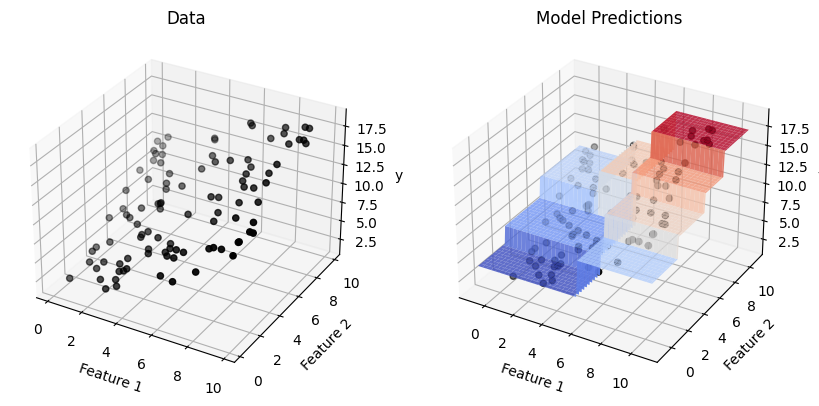

In [ ]:
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(X[:, 0], X[:, 1], y, c='black', marker='o')
ax1.set_xlabel('Feature 1')
ax1.set_ylabel('Feature 2')
ax1.set_zlabel('y')
ax1.set_title('Data')

ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
ax2.scatter(X[:, 0], X[:, 1], y, c='black', marker='o')
ax2.set_xlabel('Feature 1')
ax2.set_ylabel('Feature 2')
ax2.set_zlabel('y')
_ = ax2.set_title('Model Predictions')

<br>
<br>
<br>
<br>

## Quiz

<span style="display:none" id="q1">W3sicXVlc3Rpb24iOiAiV2hhdCBpcyB0aGUgcHVycG9zZSBvZiB0aGUgY29zdC1jb21wbGV4aXR5IHBydW5pbmcgdGVjaG5pcXVlIGluIGRlY2lzaW9uIHRyZWVzPyIsICJ0eXBlIjogIm11bHRpcGxlX2Nob2ljZSIsICJhbnN3ZXJzIjogW3siY29kZSI6ICJUbyBpbmNyZWFzZSBtb2RlbCBjb21wbGV4aXR5IiwgImNvcnJlY3QiOiBmYWxzZX0sIHsiY29kZSI6ICJUbyBwcmV2ZW50IHVuZGVyZml0dGluZyIsICJjb3JyZWN0IjogZmFsc2V9LCB7ImNvZGUiOiAiVG8gcmVkdWNlIG92ZXJmaXR0aW5nIiwgImNvcnJlY3QiOiB0cnVlfSwgeyJjb2RlIjogIlRvIGVuaGFuY2UgY29tcHV0YXRpb25hbCBcbmVmZmljaWVuY3kiLCAiY29ycmVjdCI6IGZhbHNlfV19XQ==</span>

<span style="display:none" 
id="q2">W3sicXVlc3Rpb24iOiAiWW91IGFyZSB0cmFpbmluZyBhIHJlZ3Jlc3Npb24gdHJlZSBmb3IgYSBkYXRhc2V0IHdpdGggMjAgZGF0YSBwb2ludHMuIFRoZSBtb2RlbCBtYWtlcyBwcmVkaWN0aW9ucywgYW5kIHRoZSBNZWFuIFNxdWFyZWQgRXJyb3IgKE1TRSkgaXMgY2FsY3VsYXRlZC4gVGhlIE1TRSB0dXJucyBvdXQgdG8gYmUgNDAuIE5vdywgeW91IGRlY2lkZSB0byBzcGxpdCB0aGUgZGF0YXNldCBpbnRvIHR3byBzdWJzZXRzIGFuZCB0cmFpbiBzZXBhcmF0ZSByZWdyZXNzaW9uIHRyZWVzIG9uIGVhY2ggc3Vic2V0LiBBZnRlciB0cmFpbmluZywgdGhlIE1TRSBmb3IgdGhlIGZpcnN0IHN1YnNldCBpcyAyMCwgYW5kIGZvciB0aGUgc2Vjb25kIHN1YnNldCwgaXQgaXMgMzAuIENhbGN1bGF0ZSB0aGUgV2VpZ2h0ZWQgQXZlcmFnZSBNU0UgZm9yIHRoZSB0d28gc3Vic2V0cy4iLCAidHlwZSI6ICJudW1lcmljIiwgInByZWNpc2lvbiI6IDIsICJhbnN3ZXJzIjogW3sidHlwZSI6ICJ2YWx1ZSIsICJ2YWx1ZSI6IDI4LCAiY29ycmVjdCI6IHRydWUsICJmZWVkYmFjayI6ICJDb3JyZWN0LiJ9LCB7InR5cGUiOiAicmFuZ2UiLCAicmFuZ2UiOiBbMjcuNSwgMjguNV0sICJjb3JyZWN0IjogdHJ1ZSwgImZlZWRiYWNrIjogIkNvcnJlY3QhIn0sIHsidHlwZSI6ICJyYW5nZSIsICJyYW5nZSI6IFstMTAwMDAwMDAwLCAwXSwgImNvcnJlY3QiOiBmYWxzZSwgImZlZWRiYWNrIjogIlRyeSBhZ2Fpbi4ifSwgeyJ0eXBlIjogImRlZmF1bHQiLCAiZmVlZGJhY2siOiAiVHJ5IGFnYWluLiJ9XX1d
</span>

<span style="display:none" 
id="q3">W3sicXVlc3Rpb24iOiAiV2h5IGlzIGl0IGVzc2VudGlhbCB0byBzcGxpdCBub2RlcyBpbiBhIHJlZ3Jlc3Npb24gdHJlZSBkdXJpbmcgdGhlIHRyYWluaW5nIHByb2Nlc3M/IiwgInR5cGUiOiAibXVsdGlwbGVfY2hvaWNlIiwgImFuc3dlcnMiOiBbeyJjb2RlIjogIiBUbyBpbmNyZWFzZSBjb21wdXRhdGlvbmFsXG5jb21wbGV4aXR5LiIsICJjb3JyZWN0IjogZmFsc2V9LCB7ImNvZGUiOiAiVG8gY3JlYXRlIGEgaGllcmFyY2h5IFxuIG9mIG5vZGVzIGZvciB2aXN1YWxpemF0aW9uIiwgImNvcnJlY3QiOiBmYWxzZX0sIHsiY29kZSI6ICJUbyBtYWtlIHByZWRpY3Rpb25zIFxuIGZvciBkaWZmZXJlbnQgY2F0ZWdvcmllcyIsICJjb3JyZWN0IjogZmFsc2V9LCB7ImNvZGUiOiAiVG8gc2VnbWVudCB0aGUgZGF0YSBhbmQgXG4gbWFrZSBjb250aW51b3VzIHByZWRpY3Rpb25zIiwgImNvcnJlY3QiOiB0cnVlfV19XQ==</span>

In [18]:
from jupyterquiz import display_quiz
display_quiz("#q1")
display_quiz("#q2")
display_quiz("#q3")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>